# Figures generated for SMART MRS: GABA-edited MRS Artifact Simulation Toolbox

Based on the Artifact Simulation Toolbox by Hanna Bugler, Amirmohammad Shamaei, Roberto Souza and Ashley Harris (2024)

In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import colors
from artifacts import to_fids, to_specs, interleave, undo_interleave, scale, undo_scale
from artifacts import add_time_domain_noise, add_freq_shift, add_zero_order_phase_shift, add_eddy_current_artifact, add_spur_echo_artifact, add_lipid_artifact
from artifacts import add_disruptive_motion_artifact, add_freq_drift_linear
from artifacts import add_nuisance_peak, add_baseline, add_linebroad

In [2]:
# Load Necessary Data
dir = "C:/Users/Hanna B/Desktop/Research/Projects/ArtifactSimulationToolboxPackage/"

ppm = np.load(f"{dir}ppm_Sim.npy")
time = np.load(f"{dir}time_Sim.npy")
fids_on_gt = np.load(f"{dir}fidsOnGABA.npy")
fids_off_gt = np.load(f"{dir}fidsOffGABA.npy")

# Simulate Scan
fids_on = fids_on_gt.repeat(160, axis=0)
fids_off = fids_off_gt.repeat(160, axis=0)
fids = interleave(fids_off=fids_off, fids_on=fids_on)
fids, scaleFact = scale(fids)

# Prepare Data
mean_specs_gt = (to_specs(fids[0:1, :]) - to_specs(fids[1:2, :]))[0, :]
start, end = np.where(ppm <= 0.01)[0][-1], np.where(ppm >= 4.53)[0][0]

In [3]:
# Add subfigure labels
# Adapted from https://how2matplotlib.com/annotate-subplots-in-a-figure-with-a-b-c-using-matplotlib.html

def label_subplots_2D(axs, labels=None, xpos=-0.1, ypos=1.1, size=12):
    if np.array(axs).ndim == 2:
        labels=np.array([['A', 'B', 'C'],['D', 'E', 'F']])
        for row in range (axs.shape[0]):
            for ax, label in zip(axs[row, :], labels[row, :]):
                ax.text(xpos, ypos, label, transform=ax.transAxes, fontsize=size, fontweight='bold', va='top', ha='right')

    else:
        labels=['A', 'B', 'C', 'D', 'E', 'F']
        for ax, label in zip(axs, labels):
            ax.text(xpos, ypos, label, transform=ax.transAxes, fontsize=size, fontweight='bold', va='top', ha='right')


### Nuisance Peak: Lipid Contamination

In [16]:
# Add Lipid Contamination Artifact(s) using Custom Profile and add_nuisance_peak() Function
lipid_profile_Gauss = {
    "peak_type": "G",
    "amp": [0.00001],
    "width": [2],    
    "res_freq": [1.5],
    "edited": 1.1
}

fids, np_locs = add_nuisance_peak(fids, time=time, peak_profile=lipid_profile_Gauss, np_locs=[-2,-1], num_trans=2)   # difference spectrum #1
print(f'Lipid peaks using custom profile with different line shape (Gaussian) located at transient #s: {np_locs}')

# Lipid Profile with wider peak and different resonant frequency
lipid_profile_change_Lorentz = {
    "peak_type": "L",
    "amp": [0.00001],
    "width": [2],    
    "res_freq": [1.5],
    "edited": 1.5
}

fids, np_locs = add_nuisance_peak(fids, time=time, peak_profile=lipid_profile_change_Lorentz, np_locs=[0,1], num_trans=2)   # difference spectrum #1
print(f'Lipid peaks using custom profile with different line shape (Lorentz) located at transient #s: {np_locs}')

# Lipid Profile with Voigt line shape and different amplitude (amplitude may vary with fraction attributed to Gauss vs. Lorentzian)
lipid_profile_Voigt = {
    "peak_type": "V",
    "amp": [0.00001],
    "width": [2],    
    "res_freq": [1.5],
    "edited": 1.0
}

fids, np_locs = add_nuisance_peak(fids, time=time, peak_profile=lipid_profile_Voigt, np_locs=[2,3], num_trans=2)   # difference spectrum #2
print(f'Lipid peaks using custom profile with different line shape (Voigt) located at transient #s: {np_locs}')

Lipid peaks using custom profile with different line shape (Gaussian) located at transient #s: [-2, -1]
Lipid peaks using custom profile with different line shape (Lorentz) located at transient #s: [0, 1]
Lipid peaks using custom profile with different line shape (Voigt) located at transient #s: [2, 3]


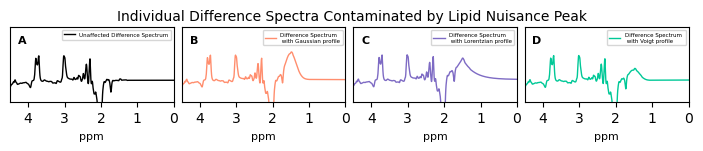

In [5]:
# Prepare Nuisance Peak Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Plot Artifact(s)
fig, ax = plt.subplots(1,4, figsize=(6.9,1.38))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Lipid Nuisance Peak", fontsize=10)
ax[0].plot(ppm, diff_specs[-2, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")               # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0].set_xlabel('ppm', fontsize=8)
ax[0].invert_xaxis()
ax[0].set_ylim(-0.005, 0.0125)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=4)

ax[1].plot(ppm, diff_specs[-1, :].real, '#FF8E6E', linewidth=1, label="Difference Spectrum \n with Gaussian profile")                        # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[1].set_xlabel('ppm', fontsize=8)
ax[1].invert_xaxis()
ax[1].set_ylim(-0.005, 0.0125)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=4)

ax[2].plot(ppm, diff_specs[0, :].real, '#7E6BC4', linewidth=1, label="Difference Spectrum \n with Lorentzian profile")        # purple
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[2].set_xlabel('ppm', fontsize=8)
ax[2].invert_xaxis()
ax[2].set_ylim(-0.005, 0.0125)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=4)

ax[3].plot(ppm, diff_specs[1, :].real, '#00C897', linewidth=1, label="Difference Spectrum \n with Voigt profile")      # green
ax[3].set_xlim(0.0, 4.5)
ax[3].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[3].set_xlabel('ppm', fontsize=8)
ax[3].invert_xaxis()
ax[3].set_ylim(-0.005, 0.0125)
ax[3].get_yaxis().set_visible(False)
ax[3].legend(loc="upper right", fontsize=4)

label_subplots_2D(ax, xpos=0.1, ypos=0.9, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

fig.tight_layout(pad=0.25)
fig.savefig(f'{dir}/v4/NuissancePeak_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/NuissancePeak_png.png', dpi=400)
                        

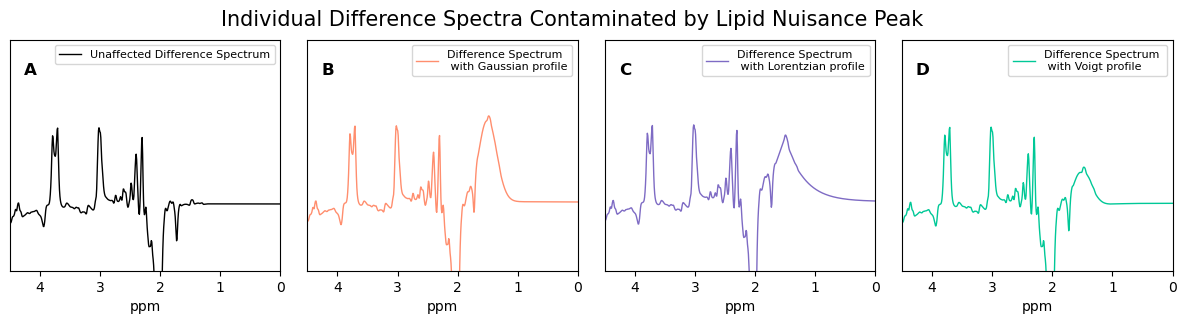

In [6]:
# Prepare Nuisance Peak Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Plot Artifact(s)
fig, ax = plt.subplots(1,4, figsize=(15, 3))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Lipid Nuisance Peak", fontsize=15)
ax[0].plot(ppm, diff_specs[-2, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")               # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0].set_xlabel('ppm', fontsize=10)
ax[0].invert_xaxis()
ax[0].set_ylim(-0.005, 0.0125)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=8)

ax[1].plot(ppm, diff_specs[-1, :].real, '#FF8E6E', linewidth=1, label="Difference Spectrum \n with Gaussian profile")                        # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[1].set_xlabel('ppm', fontsize=10)
ax[1].invert_xaxis()
ax[1].set_ylim(-0.005, 0.0125)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=8)

ax[2].plot(ppm, diff_specs[0, :].real, '#7E6BC4', linewidth=1, label="Difference Spectrum \n with Lorentzian profile")        # purple
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[2].set_xlabel('ppm', fontsize=10)
ax[2].invert_xaxis()
ax[2].set_ylim(-0.005, 0.0125)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=8)

ax[3].plot(ppm, diff_specs[1, :].real, '#00C897', linewidth=1, label="Difference Spectrum \n with Voigt profile")      # green
ax[3].set_xlim(0.0, 4.5)
ax[3].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[3].set_xlabel('ppm', fontsize=10)
ax[3].invert_xaxis()
ax[3].set_ylim(-0.005, 0.0125)
ax[3].get_yaxis().set_visible(False)
ax[3].legend(loc="upper right", fontsize=8)

label_subplots_2D(ax, xpos=0.1, ypos=0.9, size=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
                        

### Baseline Contamination: Motion Component

In [15]:
# Add Motion Baseline Contamination  using Custom Profile and add_baseline() Function
# Add Baseline Contamination using Default Motion Profile in add_disruptive_motion() Function and Lineshape Broadening

baseline_profile = { 
"base_type": "SN",
"num_bases": 3,
"amp_bases": [0.004, 0.0003, 0.002],
"comp_bases": [0.1, 0.7, 0.25],   
"trans_var": 0.001,
"slope_bases": [-0.00001, 0.00001, -0.000001],    
"base_var": 0.00001,
"spline_fitted": True}

nbase_locs_on = [4]
nbase_locs_both = [6,7]

fids, nbase_locs = add_baseline(fids, ppm, base_profile=baseline_profile, nbase_locs=nbase_locs_on, num_trans=1)     # difference spectrum #2
print(f'Baseline contamination using custom profile located at transient #s: {nbase_locs}')

fids, nbase_locs = add_baseline(fids, ppm, base_profile=baseline_profile, nbase_locs=nbase_locs_both, num_trans=2)     # difference spectrum #3
print(f'Baseline contamination using custom profile located at transient #s: {nbase_locs}')

Baseline contamination using custom profile located at transient #s: [4]
Baseline contamination using custom profile located at transient #s: [6, 7]


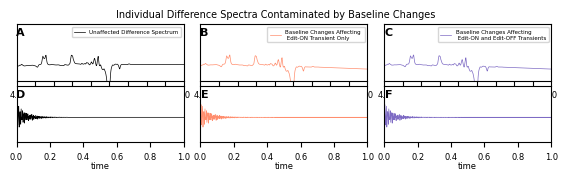

In [17]:
# Prepare Motion Baseline Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(6.9,1.53))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Baseline Changes", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0,0].set_title(' ', fontsize=1)
ax[0,0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=0.5, label="Unaffected Difference Spectrum")                                            # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.01, 0.025)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=4)

ax[0,1].plot(ppm, diff_specs[int(nbase_locs[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Baseline Changes Affecting \n Edit-ON Transient Only")                 # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.01, 0.025)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=4)

ax[0,2].plot(ppm, diff_specs[int(nbase_locs[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Baseline Changes Affecting \n Edit-ON and Edit-OFF Transients")            # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,2].invert_xaxis()
ax[0,2].set_ylim(-0.01, 0.025)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=4)
                           
# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=0.5, label="Unaffected difference transient")                                            # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,0].set_ylim(-0.0012, 0.0015)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(nbase_locs[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Baseline Changes Affecting ON Transient Only")                 # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,1].set_ylim(-0.0012, 0.0015)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(nbase_locs[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Baseline Changes Affecting ON and OFF Transient")            # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,2].set_ylim(-0.0012, 0.0015)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/BaselineChanges_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/BaselineChanges_png.png', dpi=400)

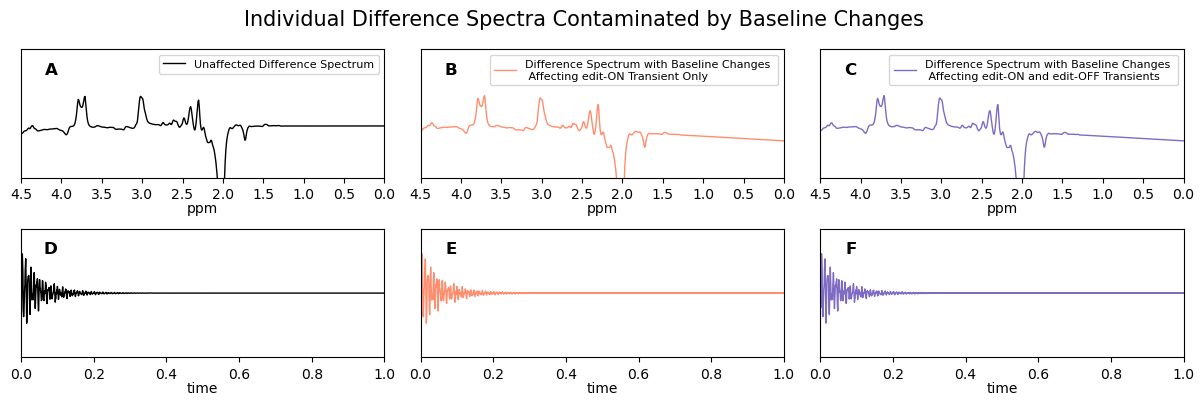

In [43]:
# Prepare Motion Baseline Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(15,4))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Baseline Changes", fontsize=15)
plt.rc('xtick', labelsize=10)
ax[0,0].plot(ppm, diff_specs[-2, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")                                            # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,0].set_xlabel('ppm', fontsize=10, labelpad=0.01)
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.01, 0.015)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=8)

ax[0,1].plot(ppm, diff_specs[int(nbase_locs[0]/2), :].real, '#FF8E6E', linewidth=1, label="Difference Spectrum with Baseline Changes \n Affecting edit-ON Transient Only")                 # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,1].set_xlabel('ppm', fontsize=10, labelpad=0.01)
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.01, 0.015)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=8)

ax[0,2].plot(ppm, diff_specs[int(nbase_locs[0]/2), :].real, '#7E6BC4', linewidth=1, label="Difference Spectrum with Baseline Changes \n Affecting edit-ON and edit-OFF Transients")            # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,2].set_xlabel('ppm', fontsize=10, labelpad=0.01)
ax[0,2].invert_xaxis()
ax[0,2].set_ylim(-0.01, 0.015)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=8)
                           
# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=1, label="Unaffected difference transient")                                            # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time', fontsize=10, labelpad=0.01)
ax[1,0].set_ylim(-0.001, 0.001)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(nbase_locs[0]/2), :].real, '#FF8E6E', linewidth=1, label="Baseline Changes Affecting ON Transient Only")                 # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time', fontsize=10, labelpad=0.01)
ax[1,1].set_ylim(-0.001, 0.001)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(nbase_locs[0]/2), :].real, '#7E6BC4', linewidth=1, label="Baseline Changes Affecting ON and OFF Transient")            # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time', fontsize=10, labelpad=0.01)
ax[1,2].set_ylim(-0.001, 0.001)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

### Line Broadening Contamination: Motion Component

In [14]:
# Add Line Broadening Contamination using add_linebroad()
var = np.random.uniform(-0.005, 0.005, size=2)

amp=[1.45, 1.45*(1+var[0])]
damp=[15, 15*(1+var[1])]

mot_locs_on = [8]
mot_locs_both = [10, 11]

# Line Broadening Artifact with Mid-Range Parameter Values Inserted into Edit-ON Only
fids, lb_locs = add_linebroad(fids=fids, time=time, amp=[amp[0]], damp=[damp[0]], mot_locs=mot_locs_on, nmb_motion=1)                          # difference spectrum #4
print(f'Line Broadening affecting edit-ON only located at transient #s: {lb_locs}')

# Line Broadening Artifact with Mid-Range Parameter Values Inserted into Edit-ON and Edit-OFF
fids, lb_locs = add_linebroad(fids=fids, time=time, amp=amp, damp=damp, mot_locs=mot_locs_both, nmb_motion=2)                                  # difference spectrum #5
print(f'Line Broadening affecting edit-ON and edit-OFF located at transient #s: {lb_locs}')


Line Broadening affecting edit-ON only located at transient #s: [8]
Line Broadening affecting edit-ON and edit-OFF located at transient #s: [10 11]


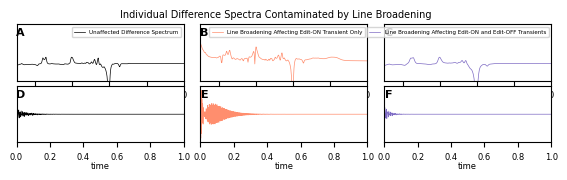

In [16]:
# Prepare Motion Linebroadened Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(6.9,1.53))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Line Broadening", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0,0].set_title(' ', fontsize=1)
ax[0,0].plot(ppm, diff_specs[-2, :].real, 'black', linewidth=0.5, label="Unaffected Difference Spectrum")                                            # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.015, 0.035)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=4)

ax[0,1].plot(ppm, diff_specs[int(4), :].real, '#FF8E6E', linewidth=0.5, label="Line Broadening Affecting Edit-ON Transient Only")                 # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.015, 0.035)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=4)

ax[0,2].plot(ppm, diff_specs[int(5), :].real, '#7E6BC4', linewidth=0.5, label="Line Broadening Affecting Edit-ON and Edit-OFF Transients")            # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,2].invert_xaxis()
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,2].set_ylim(-0.015, 0.035)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=4)
                           

# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=0.5, label="Unaffected difference transient")                                            # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,0].set_ylim(-0.0035, 0.0035)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(4), :].real, '#FF8E6E', linewidth=0.5, label="Line Broadening Affecting \n Edit-ON Transient Only")                 # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,1].set_ylim(-0.0035, 0.0035)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(5), :].real, '#7E6BC4', linewidth=0.5, label="Line Broadening Affecting \n Edit-ON and Edit-OFF Transients")            # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,2].set_ylim(-0.0035, 0.0035)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/LineBroad_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/LineBroad_png.png', dpi=400)

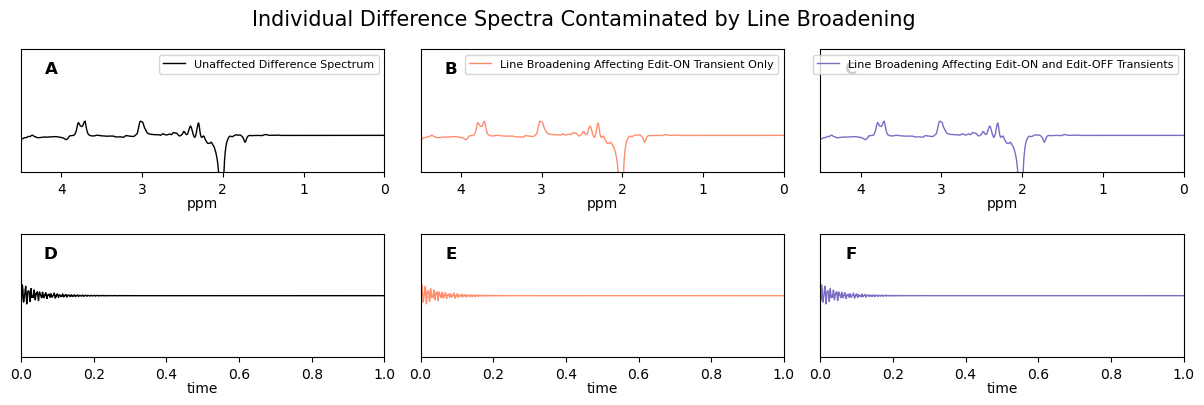

In [42]:
# Prepare Motion Linebroadened Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(15,4))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Line Broadening", fontsize=15)
plt.rc('xtick', labelsize=10)
ax[0,0].set_title(' ', fontsize=1)
ax[0,0].plot(ppm, diff_specs[-2, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")                                            # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,0].set_xlabel('ppm', fontsize=10, labelpad=0.01)
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.015, 0.035)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=8)

ax[0,1].plot(ppm, diff_specs[int(4), :].real, '#FF8E6E', linewidth=1, label="Line Broadening Affecting Edit-ON Transient Only")                 # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,1].set_xlabel('ppm', fontsize=10, labelpad=0.01)
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.015, 0.035)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=8)

ax[0,2].plot(ppm, diff_specs[int(5), :].real, '#7E6BC4', linewidth=1, label="Line Broadening Affecting Edit-ON and Edit-OFF Transients")            # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].set_xlabel('ppm', fontsize=10, labelpad=0.01)
ax[0,2].invert_xaxis()
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,2].set_ylim(-0.015, 0.035)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=8)
                           

# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=1, label="Unaffected difference transient")                                            # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time', fontsize=10, labelpad=0.01)
ax[1,0].set_ylim(-0.0035, 0.0035)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(4), :].real, '#FF8E6E', linewidth=1, label="Line Broadening Affecting \n Edit-ON Transient Only")                 # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time', fontsize=10, labelpad=0.01)
ax[1,1].set_ylim(-0.0035, 0.0035)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(5), :].real, '#7E6BC4', linewidth=1, label="Line Broadening Affecting \n Edit-ON and Edit-OFF Transients")            # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time', fontsize=10, labelpad=0.01)
ax[1,2].set_ylim(-0.0035, 0.0035)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.1, ypos=0.9, size=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

### Eddy Current Contamination

In [13]:
# Add Eddy Current Artifact using add_eddy_current_artifact() Function
var = np.random.uniform(-0.005, 0.005, size=2)

amp = [10, 10*(1+var[0])]
tc = [0.1, 0.1*(1+var[1])]

ec_locs_on = [12]
ec_locs_both = [14,15]

# Eddy Current Artifact with Mid-Range Parameter Values Inserted into Edit-ON Only
fids, ec_locs = add_eddy_current_artifact(fids, time, amp=[amp[0]], tc=[tc[0]], ec_locs=ec_locs_on, nmb_ecs=1)                          # difference spectrum #6
print(f'Eddy Current affecting edit-ON only with mid-range parameter values located at transient #s: {ec_locs}')

# Eddy Current Artifact with Mid-Range Parameter Values Inserted into Edit-ON and Edit-OFF
fids, ec_locs = add_eddy_current_artifact(fids, time, amp=amp, tc=tc, ec_locs=ec_locs_both, nmb_ecs=2)                                  # difference spectrum #7
print(f'Eddy Current affecting edit-ON and edit-OFF with mid-range parameter values located at transient #s: {ec_locs}')

Eddy Current affecting edit-ON only with mid-range parameter values located at transient #s: [12]
Eddy Current affecting edit-ON and edit-OFF with mid-range parameter values located at transient #s: [14 15]


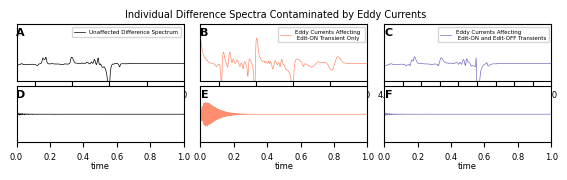

In [36]:
# Prepare Eddy Current Contaminated Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(6.9,1.53))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Eddy Currents", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0,0].set_title(' ', fontsize=1)
ax[0,0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=0.5, label="Unaffected Difference Spectrum")                                            # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.015, 0.035)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=4)

ax[0,1].plot(ppm, diff_specs[int(ec_locs_on[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Eddy Currents Affecting \n Edit-ON Transient Only")                 # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.015, 0.035)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=4)

ax[0,2].plot(ppm, diff_specs[int(ec_locs_both[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Eddy Currents Affecting \n Edit-ON and Edit-OFF Transients")            # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,2].invert_xaxis()
ax[0,2].set_ylim(-0.015, 0.035)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=4)
                           

# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=0.5, label="Unaffected difference transient")                                            # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,0].set_ylim(-0.015, 0.015)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(ec_locs_on[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Eddy Currents Affecting ON Transient Only")                 # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,1].set_ylim(-0.015, 0.015)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(ec_locs_both[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Eddy Currents Affecting ON and OFF Transient")            # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,2].set_ylim(-0.015, 0.015)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/EC_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/EC_png.png', dpi=400)

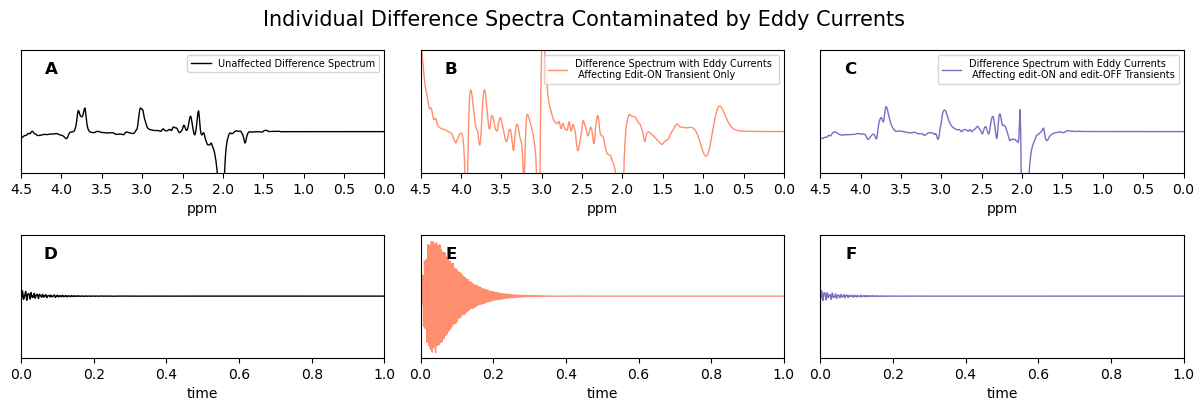

In [41]:
# Prepare Eddy Current Contaminated Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(15,4))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Eddy Currents", fontsize=15)
plt.rc('xtick', labelsize=10)
ax[0,0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")                                            # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,0].set_xlabel('ppm')
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.01, 0.02)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=7)

ax[0,1].plot(ppm, diff_specs[int(ec_locs_on[0]/2), :].real, '#FF8E6E', linewidth=1, label="Difference Spectrum with Eddy Currents \n Affecting Edit-ON Transient Only")                 # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,1].set_xlabel('ppm')
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.01, 0.02)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=7)

ax[0,2].plot(ppm, diff_specs[int(ec_locs_both[0]/2), :].real, '#7E6BC4', linewidth=1, label="Difference Spectrum with Eddy Currents \n Affecting edit-ON and edit-OFF Transients")            # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,2].set_xlabel('ppm')
ax[0,2].invert_xaxis()
ax[0,2].set_ylim(-0.01, 0.02)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=7)
                           

# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=1, label="Unaffected difference transient")                                            # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylim(-0.007, 0.007)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(ec_locs_on[0]/2), :].real, '#FF8E6E', linewidth=1, label="Eddy Currents Affecting ON Transient Only")                 # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylim(-0.007, 0.007)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(ec_locs_both[0]/2), :].real, '#7E6BC4', linewidth=1, label="Eddy Currents Affecting ON and OFF Transient")            # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time')
ax[1,2].set_ylim(-0.007, 0.007)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

### Spurious Echo Artifact

In [12]:
# Add Spurious Echo Artifact using add_spur_echo_artifact() Function
var = np.random.uniform(-0.05, 0.05, size=3)

phase = [2.0, 2.0]
amp = [100, 100*(1+var[0])]
cs = [1.5, 1.5] 
ts = [650, 650*(1+var[1])]
tf = [ts[0]+150, ts[0]+150*(1+var[2])] 

gs_locs_on = [16]
gs_locs_both = [18,19]

# Spurious Echo Artifact with Low Parameter Values Inserted into Edit-ON Only
fids, sp_locs = add_spur_echo_artifact(fids=fids, time=time, amp=[amp[0]], cs=[cs[0]], phase=[phase[0]], tstart=[ts[0]], tfinish=[tf[0]], gs_locs=gs_locs_on, nmb_sps=1)  
print(f'Spurious Echo affecting edit-ON only located at transient #s: {sp_locs}')                                                    # difference spectrum #8      

# Spurious Echo Artifact with Low Parameter Values Inserted into Edit-ON and Edit-OFF Pair
fids, sp_locs = add_spur_echo_artifact(fids=fids, time=time, amp=amp, cs=cs, phase=phase, tstart=ts, tfinish=tf, gs_locs=gs_locs_both, nmb_sps=2)
print(f'Spurious Echo affecting edit-ON and edit-OFF located at transient #s: {sp_locs}')                                             # difference spectrum #9

Spurious Echo affecting edit-ON only located at transient #s: [16]
Spurious Echo affecting edit-ON and edit-OFF located at transient #s: [18 19]


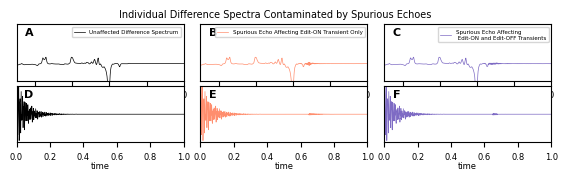

In [50]:
# Prepare Spurious Echo Contaminated Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(6.9,1.53))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Spurious Echoes", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0,0].set_title(' ', fontsize=1)
ax[0,0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=0.5, label="Unaffected Difference Spectrum")                                                # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,0].invert_xaxis()
ax[0,0].set_ylim(-0.015,  0.035)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=4)

ax[0,1].plot(ppm, diff_specs[int(gs_locs_on[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Spurious Echo Affecting Edit-ON Transient Only")                     # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.015,  0.035)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=4)

ax[0,2].plot(ppm, diff_specs[int(gs_locs_both[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Spurious Echo Affecting \n Edit-ON and Edit-OFF Transients")                # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0,2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0,2].invert_xaxis()
ax[0,2].set_ylim(-0.015, 0.035)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=4)
                           

# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=0.5, label="Unaffected difference transient")                                                # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,0].set_ylim(-0.0005, 0.0005)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(gs_locs_on[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Spurious Echo Affecting ON Transient Only")                     # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,1].set_ylim(-0.0005, 0.0005)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(gs_locs_both[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Spurious Echo Affecting ON and OFF Transient")                # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time', fontsize=6, labelpad=0.01)
ax[1,2].set_ylim(-0.0005, 0.0005)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.1, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/SP_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/SP_png.png', dpi=400)

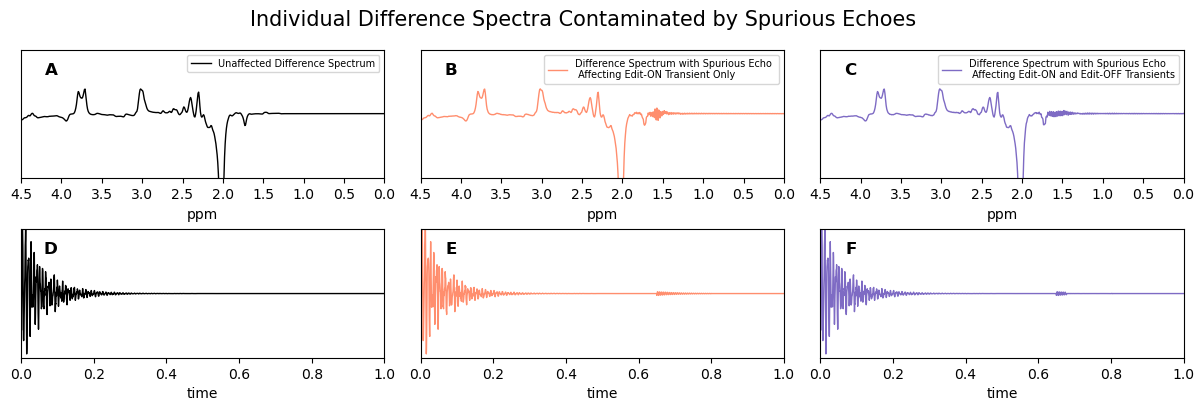

In [53]:
# Prepare Spurious Echo Contaminated Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(2,3, figsize=(15,4))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Difference Spectra Contaminated by Spurious Echoes", fontsize=15)
plt.rc('xtick', labelsize=10)
ax[0,0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")                                                # black
ax[0,0].set_xlim(0.0, 4.5)
ax[0,0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,0].set_xlabel('ppm')
ax[0,0].invert_xaxis()
# ax[0,0].set_ylim(-0.005, 0.01)
ax[0,0].set_ylim(-0.015,  0.015)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(loc="upper right", fontsize=7)

ax[0,1].plot(ppm, diff_specs[int(gs_locs_on[0]/2), :].real, '#FF8E6E', linewidth=1, label="Difference Spectrum with Spurious Echo \n Affecting Edit-ON Transient Only")                     # orange
ax[0,1].set_xlim(0.0, 4.5)
ax[0,1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,1].set_xlabel('ppm')
ax[0,1].invert_xaxis()
ax[0,1].set_ylim(-0.015,  0.015)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(loc="upper right", fontsize=7)

ax[0,2].plot(ppm, diff_specs[int(gs_locs_both[0]/2), :].real, '#7E6BC4', linewidth=1, label="Difference Spectrum with Spurious Echo \n Affecting Edit-ON and Edit-OFF Transients")                # purple
ax[0,2].set_xlim(0.0, 4.5)
ax[0,2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0,2].set_xlabel('ppm')
ax[0,2].invert_xaxis()
ax[0,2].set_ylim(-0.015, 0.015)
ax[0,2].get_yaxis().set_visible(False)
ax[0,2].legend(loc="upper right", fontsize=7)
                           

# Time domain
on_fids, off_fids = undo_interleave((fids))
diff_fids = (on_fids - off_fids)

ax[1,0].plot(time, diff_fids[-1, :].real, 'black', linewidth=1, label="Unaffected difference transient")                                                # black
ax[1,0].set_xlim(0.0, 1.0)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylim(-0.0005, 0.0005)
ax[1,0].get_yaxis().set_visible(False)

ax[1,1].plot(time, diff_fids[int(gs_locs_on[0]/2), :].real, '#FF8E6E', linewidth=1, label="Spurious Echo Affecting ON Transient Only")                     # orange
ax[1,1].set_xlim(0.0, 1.0)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylim(-0.0005, 0.0005)
ax[1,1].get_yaxis().set_visible(False)

ax[1,2].plot(time, diff_fids[int(gs_locs_both[0]/2), :].real, '#7E6BC4', linewidth=1, label="Spurious Echo Affecting ON and OFF Transient")                # purple
ax[1,2].set_xlim(0.0, 1.0)
ax[1,2].set_xlabel('time')
ax[1,2].set_ylim(-0.0005, 0.0005)
ax[1,2].get_yaxis().set_visible(False)

label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

### Linear Frequency Drift

In [4]:
# Add Frequency Drift over Numerous Consecutive Transients
fids, trans_affected = add_freq_drift_linear(fids=fids, time=time, freq_offset_var=0.25, freq_shift=15, start_trans=0, num_trans=318, echo=True)
print(f'Frequency Drift over Numerous Consecutive Transients begins at transient #{trans_affected[0]} and ends at transient #{trans_affected[1]}.')

Non-user defined parameters for "add_freq_drift_linear": []
Frequency Drift over Numerous Consecutive Transients begins at transient #0 and ends at transient #318.


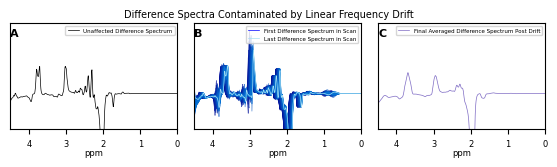

In [7]:
# Prepare Linear Frequency Drift Contaminated Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Plot Artifact(s)
fig, ax = plt.subplots(1,3, figsize=(6.9,1.38))
fig.patch.set_facecolor('white')
fig.suptitle(f"Difference Spectra Contaminated by Linear Frequency Drift", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0].set_title(' ', fontsize=1)
ax[0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=0.5, label="Unaffected Difference Spectrum")                    # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0].invert_xaxis()
ax[0].set_ylim(-0.0075, 0.015)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=4)


cmap = colors.LinearSegmentedColormap.from_list("", ['#030c96', '#07b6fd'])                                 # blue
ax[1].plot(ppm, diff_specs[0, :].real, linewidth=0.5, color='blue', alpha=1, label="First Difference Spectrum in Scan")
for ii in range(1, (diff_specs.shape[0]-2)):
    ax[1].plot(ppm, diff_specs[ii, :].real, linewidth=0.5, color=cmap(ii), alpha=0.7)
ax[1].plot(ppm, diff_specs[-2, :].real, linewidth=0.5, color='#a5e0f3', alpha=1, label="Last Difference Spectrum in Scan")#7E6BC4, #aae2f9
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[1].invert_xaxis()
ax[1].set_ylim(-0.0075, 0.015)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=4)

ax[2].plot(ppm, diff_specs.mean(axis=0).real, linewidth=0.5, color='#7E6BC4', alpha=1, label="Final Averaged Difference Spectrum Post Drift")
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[2].invert_xaxis()
ax[2].set_ylim(-0.0075, 0.015)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=4)

label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/LFD_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/LFD_png.png', dpi=400)


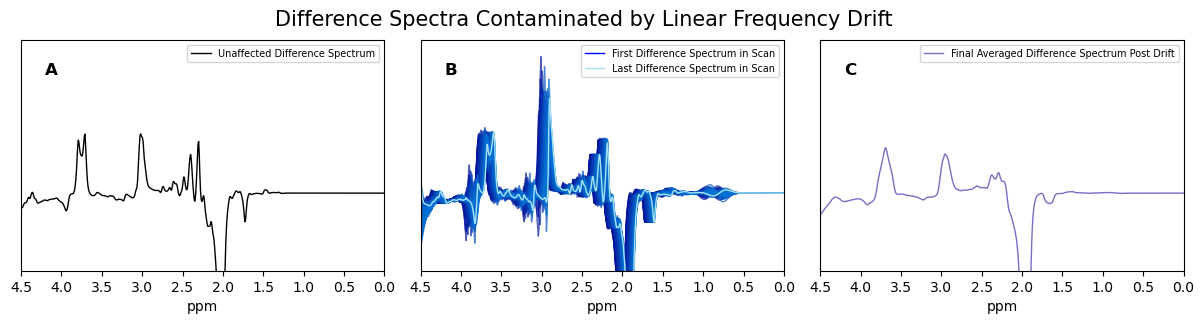

In [11]:
# Prepare Linear Frequency Drift Contaminated Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Plot Artifact(s)
fig, ax = plt.subplots(1,3, figsize=(15,3))
fig.patch.set_facecolor('white')
fig.suptitle(f"Difference Spectra Contaminated by Linear Frequency Drift", fontsize=15)
plt.rc('xtick', labelsize=10)
ax[0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")                    # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0].set_xlabel('ppm')
ax[0].invert_xaxis()
ax[0].set_ylim(-0.0075, 0.015)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=7)


# cmap = colors.LinearSegmentedColormap.from_list("", ["blue", "dodgerblue", "black"])                                 # blue
cmap = colors.LinearSegmentedColormap.from_list("", ['#030c96', '#07b6fd'])                                 # blue
ax[1].plot(ppm, diff_specs[0, :].real, linewidth=1, color='blue', alpha=1, label="First Difference Spectrum in Scan")
for ii in range(1, (diff_specs.shape[0]-2)):
    ax[1].plot(ppm, diff_specs[ii, :].real, linewidth=1, color=cmap(ii), alpha=0.7)
ax[1].plot(ppm, diff_specs[-2, :].real, linewidth=1, color='#a5e0f3', alpha=1, label="Last Difference Spectrum in Scan")#7E6BC4, #aae2f9
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[1].set_xlabel('ppm')
ax[1].invert_xaxis()
ax[1].set_ylim(-0.0075, 0.015)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=7)

ax[2].plot(ppm, diff_specs.mean(axis=0).real, linewidth=1, color='#7E6BC4', alpha=1, label="Final Averaged Difference Spectrum Post Drift")
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[2].set_xlabel('ppm')
ax[2].invert_xaxis()
ax[2].set_ylim(-0.0075, 0.015)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=7)

label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()


### Frequency and Phase Shifts

In [5]:
# Add Frequency and Phase Shift(s)
fids, trans_affectedfs = add_freq_shift(fids=fids, time=time, freq_var=20, shift_locs=[20], num_trans=1)
fids, trans_affectedps = add_zero_order_phase_shift(fids=fids, phase_var=60, shift_locs=[22], num_trans=1)
print(f'Frequency shifted transient: #{trans_affectedfs}')   
print(f'Phase shifted transient: #{trans_affectedps}') 

Frequency shifted transient: #[20]
Phase shifted transient: #[22]


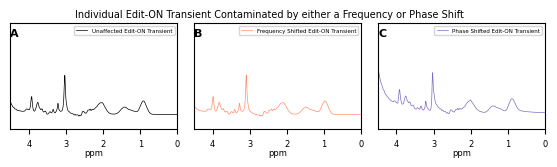

In [9]:
# Prepare Random Frequency and Phase Contaminated Data for Plotting - MANUSCRIPT FIGURE
on_specsfp, off_specsfp = undo_interleave(to_specs(fids))
diff_specsfp = (on_specsfp - off_specsfp)

# NEED TO DETERMINE ONE ROW OR TWO

# Plot Artifact(s)
fig, ax = plt.subplots(1,3, figsize=(6.9,1.38))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Edit-ON Transient Contaminated by either a Frequency or Phase Shift", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0].set_title(' ', fontsize=1)
ax[0].plot(ppm, on_specsfp[-1, :].real, 'black', linewidth=0.5, label="Unaffected Edit-ON Transient")                    # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0].invert_xaxis()
ax[0].set_ylim(-0.01, 0.1)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=4)

ax[1].plot(ppm, on_specsfp[int(trans_affectedfs[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Frequency Shifted Edit-ON Transient")                # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[1].invert_xaxis()
ax[1].set_ylim(-0.01, 0.1)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=4)

ax[2].plot(ppm, on_specsfp[int(trans_affectedps[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Phase Shifted Edit-ON Transient")                # purple
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[2].invert_xaxis()
ax[2].set_ylim(-0.01, 0.1)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=4)
                           
label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/RFP_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/RFP_png.png', dpi=400)

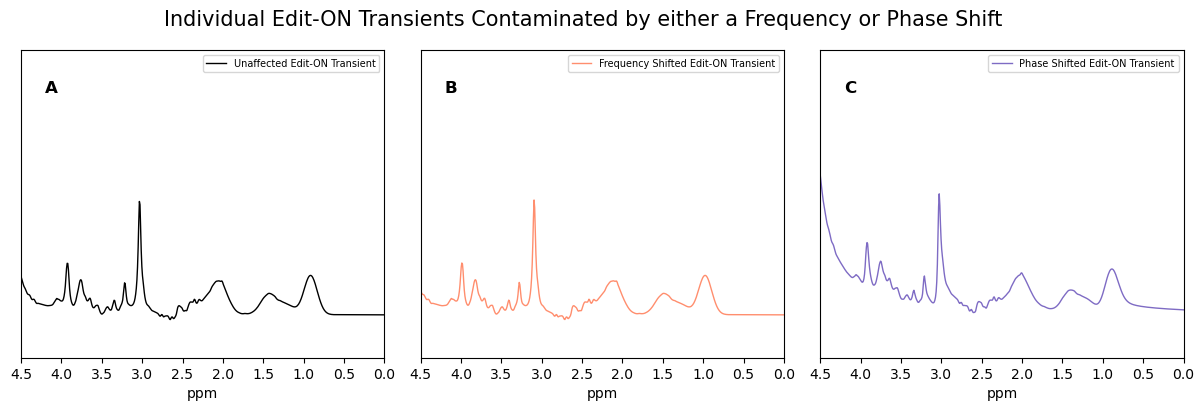

In [12]:
# Prepare Random Frequency and Phase Contaminated Data for Plotting - NOTEBOOK FIGURE
on_specsfp, off_specsfp = undo_interleave(to_specs(fids))
diff_specsfp = (on_specsfp - off_specsfp)

# NEED TO DETERMINE ONE ROW OR TWO

# Plot Artifact(s)
fig, ax = plt.subplots(1,3, figsize=(15,4))
fig.patch.set_facecolor('white')
fig.suptitle(f"Individual Edit-ON Transients Contaminated by either a Frequency or Phase Shift", fontsize=15)
plt.rc('xtick', labelsize=10)
ax[0].plot(ppm, on_specsfp[-1, :].real, 'black', linewidth=1, label="Unaffected Edit-ON Transient")                    # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0].set_xlabel('ppm')
ax[0].invert_xaxis()
ax[0].set_ylim(-0.01, 0.1)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=7)

ax[1].plot(ppm, on_specsfp[int(trans_affectedfs[0]/2), :].real, '#FF8E6E', linewidth=1, label="Frequency Shifted Edit-ON Transient")                # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[1].set_xlabel('ppm')
ax[1].invert_xaxis()
ax[1].set_ylim(-0.01, 0.1)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=7)

ax[2].plot(ppm, on_specsfp[int(trans_affectedps[0]/2), :].real, '#7E6BC4', linewidth=1, label="Phase Shifted Edit-ON Transient")                # purple
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[2].set_xlabel('ppm')
ax[2].invert_xaxis()
ax[2].set_ylim(-0.01, 0.1)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=7)
                           
label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1)
plt.show()

### Disruptive Motion Artifact (Line broadening and baseline changes)

In [4]:
# Add Linebroadening and Baseline Distortion (Disruptive Motion)
fids, artifLocsDm = add_disruptive_motion_artifact(fids, time, ppm, mot_locs=[24, 25], nmb_motion=2)
print(f'Disruptive motion artifact (line broadening and baseline changes) example with default values located at transient #s: {artifLocsDm}')           # difference spectrum #10

Disruptive motion artifact (line broadening and baseline changes) example with default values located at transient #s: [24 25]


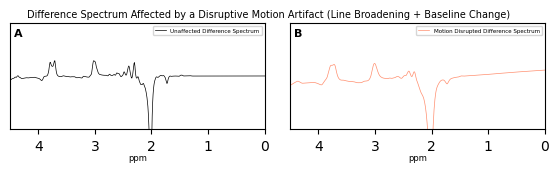

In [5]:
# Prepare Disruptive Motion Contaminated Data for Plotting - MANUSCRIPT FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(1,2, figsize=(6.9,1.38))
fig.patch.set_facecolor('white')
fig.suptitle(f"Difference Spectrum Affected by a Disruptive Motion Artifact (Line Broadening + Baseline Change)", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0].set_title(' ', fontsize=1)
ax[0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=0.5, label="Unaffected Difference Spectrum")                          # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0].invert_xaxis()
ax[0].set_ylim(-0.02, 0.02)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=4)

ax[1].plot(ppm, diff_specs[int(artifLocsDm[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Motion Disrupted Difference Spectrum")     # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[1].invert_xaxis()
ax[1].set_ylim(-0.02, 0.02)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=4)

label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/DM_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/DM_png.png', dpi=400)

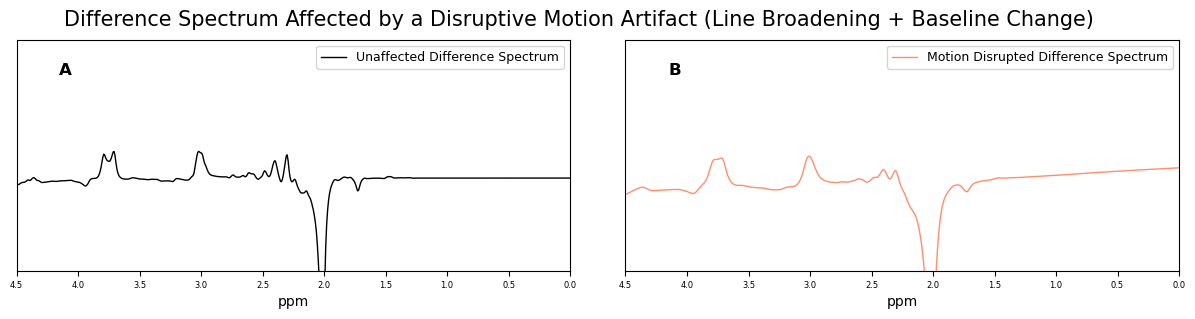

In [8]:
# Prepare Disruptive Motion Contaminated Data for Plotting - NOTEBOOK FIGURE
on_specs, off_specs = undo_interleave(to_specs(fids))
diff_specs = (on_specs - off_specs)

# Frequency domain
fig, ax = plt.subplots(1,2, figsize=(15,3))
fig.patch.set_facecolor('white')
fig.suptitle(f"Difference Spectrum Affected by a Disruptive Motion Artifact (Line Broadening + Baseline Change)", fontsize=15)
plt.rc('xtick', labelsize=6)
ax[0].plot(ppm, diff_specs[-1, :].real, 'black', linewidth=1, label="Unaffected Difference Spectrum")                          # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0].set_xlabel('ppm')
ax[0].invert_xaxis()
ax[0].set_ylim(-0.02, 0.03)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=9)

ax[1].plot(ppm, diff_specs[int(artifLocsDm[0]/2), :].real, '#FF8E6E', linewidth=1, label="Motion Disrupted Difference Spectrum")     # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[1].set_xlabel('ppm')
ax[1].invert_xaxis()
ax[1].set_ylim(-0.02, 0.03)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=9)

label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1)
plt.show()

### Toolbox Considerations

In [4]:
# Order of Amplitude Noise and Spurious Echoes
var = np.random.uniform(-0.05, 0.05, size=3)

phase = [2.0, 2.0]
amp_s = [100, 100*(1+var[0])]
cs_s = [1.5, 1.5] 
ts_s = [650, 650*(1+var[1])]
tf_s = [ts_s[0]+150, ts_s[0]+150*(1+var[2])] 

# Noise added BEFORE spurious echo
pre_fids = add_time_domain_noise(np.copy(fids), noise_level=0.000005)
pre_fids, sp_locs_pre = add_spur_echo_artifact(pre_fids, time, amp=amp_s, cs=cs_s, phase=phase, tstart=ts_s, tfinish=tf_s, gs_locs=[26], nmb_sps=2)   
print(f'Noise added BEFORE spurious echos located at transient #s: {sp_locs_pre}')                                                            # difference spectrum #16

# Noise added AFTER spurious echo
post_fids, sp_locs_post = add_spur_echo_artifact(np.copy(fids), time, amp=amp_s, cs=cs_s, phase=phase, tstart=ts_s, tfinish=tf_s, gs_locs=[26], nmb_sps=2)   
post_fids = add_time_domain_noise(post_fids, noise_level=0.000005)
print(f'Noise added AFTER spurious echos located at transient #s: {sp_locs_post}')                                                               # difference spectrum #16

Noise added BEFORE spurious echos located at transient #s: [110 143]
Noise added AFTER spurious echos located at transient #s: [ 51 229]


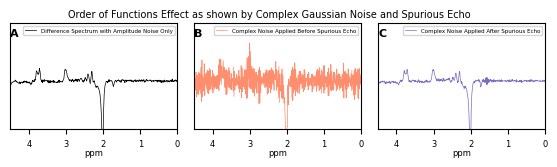

In [12]:
# Prepare Spurious Echo Contaminated Data for Plotting - MANUSCRIPT FIGURE
on_specs_pre, off_specs_pre = undo_interleave(to_specs(pre_fids))
diff_specs_pre = (on_specs_pre - off_specs_pre)

on_specs_post, off_specs_post = undo_interleave(to_specs(post_fids))
diff_specs_post = (on_specs_post - off_specs_post)

# Frequency domain
fig, ax = plt.subplots(1,3, figsize=(6.9,1.38))
fig.patch.set_facecolor('white')
fig.suptitle(f"Order of Functions Effect as shown by Complex Gaussian Noise and Spurious Echo", fontsize=7)
plt.rc('xtick', labelsize=6)
ax[0].set_title(' ', fontsize=1)
ax[0].plot(ppm, diff_specs_pre[-2, :].real, 'black', linewidth=0.5, label="Difference Spectrum with Amplitude Noise Only")                                  # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[0].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[0].invert_xaxis()
ax[0].set_ylim(-0.025, 0.030)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=4)

ax[1].plot(ppm, diff_specs_pre[int(sp_locs_pre[0]/2), :].real, '#FF8E6E', linewidth=0.5, label="Complex Noise Applied Before Spurious Echo")                    # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[1].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[1].invert_xaxis()
ax[1].set_ylim(-0.025, 0.030)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=4)

ax[2].plot(ppm, diff_specs_post[int(sp_locs_post[0]/2), :].real, '#7E6BC4', linewidth=0.5, label="Complex Noise Applied After Spurious Echo")                     # purple
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
ax[2].set_xlabel('ppm', fontsize=6, labelpad=0.01)
ax[2].invert_xaxis()
ax[2].set_ylim(-0.025, 0.030)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=4)

label_subplots_2D(ax, xpos=0.05, ypos=0.95, size=8)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

fig.tight_layout(pad=0.075)
fig.savefig(f'{dir}/v4/TC_NSP_TIFF.TIFF', dpi=400)
fig.savefig(f'{dir}/v4/TC_NSP_png.png', dpi=400)

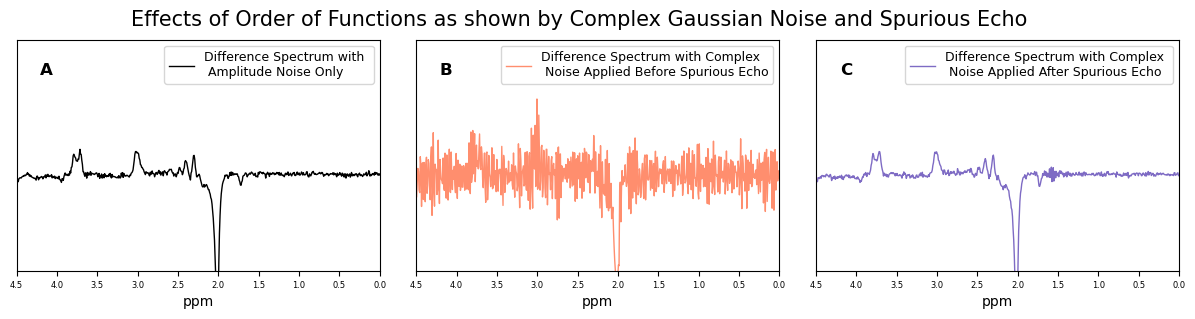

In [15]:
# Prepare Spurious Echo Contaminated Data for Plotting - NOTEBOOK FIGURE
on_specs_pre, off_specs_pre = undo_interleave(to_specs(pre_fids))
diff_specs_pre = (on_specs_pre - off_specs_pre)

on_specs_post, off_specs_post = undo_interleave(to_specs(post_fids))
diff_specs_post = (on_specs_post - off_specs_post)

# Frequency domain
fig, ax = plt.subplots(1,3, figsize=(15,3))
fig.patch.set_facecolor('white')
fig.suptitle(f"Effects of Order of Functions as shown by Complex Gaussian Noise and Spurious Echo", fontsize=15)
plt.rc('xtick', labelsize=6)
ax[0].plot(ppm, diff_specs_pre[-2, :].real, 'black', linewidth=1, label="Difference Spectrum with \n Amplitude Noise Only")                                  # black
ax[0].set_xlim(0.0, 4.5)
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0].set_xlabel('ppm')
ax[0].invert_xaxis()
ax[0].set_ylim(-0.025, 0.035)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=9)

ax[1].plot(ppm, diff_specs_pre[int(sp_locs_pre[0]/2), :].real, '#FF8E6E', linewidth=1, label="Difference Spectrum with Complex \n Noise Applied Before Spurious Echo")                    # orange
ax[1].set_xlim(0.0, 4.5)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[1].set_xlabel('ppm')
ax[1].invert_xaxis()
ax[1].set_ylim(-0.025, 0.035)
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=9)

ax[2].plot(ppm, diff_specs_post[int(sp_locs_post[0]/2), :].real, '#7E6BC4', linewidth=1, label="Difference Spectrum with Complex \n Noise Applied After Spurious Echo")                     # purple
ax[2].set_xlim(0.0, 4.5)
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[2].set_xlabel('ppm')
ax[2].invert_xaxis()
ax[2].set_ylim(-0.025, 0.035)
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="upper right", fontsize=9)

label_subplots_2D(ax, xpos=0.1, ypos=0.9)
plt.subplots_adjust(wspace=0.1)
plt.show()

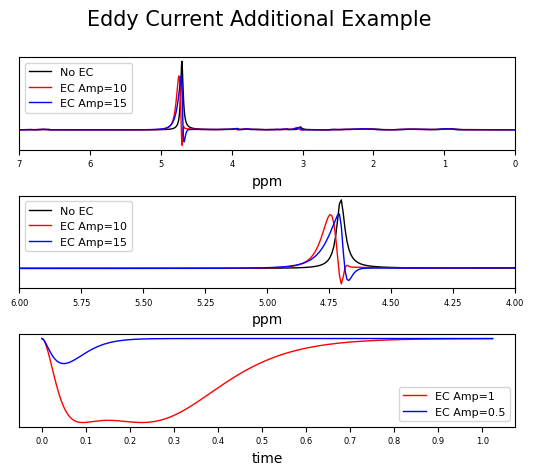

In [19]:
# Additional Eddy Current EXAMPLE
# vars
import math
fids_pre = np.copy(fids[0:1, :])
fids_pre2 = np.copy(fids[0:1, :])
amp = 10
amp2 = 10
tc1 = 0.15
tc2 = 0.05

# ec
ec1 = np.exp(1j * time * (amp * np.exp(-time / tc1)) * 2 * math.pi)
fids_post = fids_pre * ec1

ec2 = np.exp(1j * time * (amp2 * np.exp(-time / tc2)) * 2 * math.pi)
fids_post2 = fids_pre2 * ec2

# Prepare EC Contaminated Data for Plotting
specs_pre = to_specs(fids_pre)
specs_post = to_specs(fids_post)
specs_post2 = to_specs(fids_post2)

# Plot
fig, ax = plt.subplots(3)
fig.suptitle(f"Eddy Current Additional Example", fontsize=15)
ax[0].plot(ppm, np.squeeze(specs_pre).real, 'black', linewidth=1, label='No EC')
ax[0].plot(ppm, np.squeeze(specs_post).real, 'red', linewidth=1, label='EC Amp=10')
ax[0].plot(ppm, np.squeeze(specs_post2).real, 'blue', linewidth=1, label='EC Amp=15')
ax[0].set_xlim(0, 7.0)
ax[0].set_xlabel('ppm')
ax[0].invert_xaxis()
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper left", fontsize=8)

ax[1].plot(ppm, np.squeeze(specs_pre).real, 'black', linewidth=1, label='No EC')
ax[1].plot(ppm, np.squeeze(specs_post).real, 'red', linewidth=1, label='EC Amp=10')
ax[1].plot(ppm, np.squeeze(specs_post2).real, 'blue', linewidth=1, label='EC Amp=15')
ax[1].set_xlim(4.0, 6.0)
ax[1].set_xlabel('ppm')
ax[1].invert_xaxis()
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper left", fontsize=8)

ax[2].plot(time, np.squeeze(ec1).real, 'red', linewidth=1, label='EC Amp=1')
ax[2].plot(time, np.squeeze(ec2).real, 'blue', linewidth=1, label='EC Amp=0.5')
ax[2].xaxis.set_major_locator(plticker.MultipleLocator(base=0.1))
ax[2].set_xlabel('time')
ax[2].get_yaxis().set_visible(False)
ax[2].legend(loc="lower right", fontsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

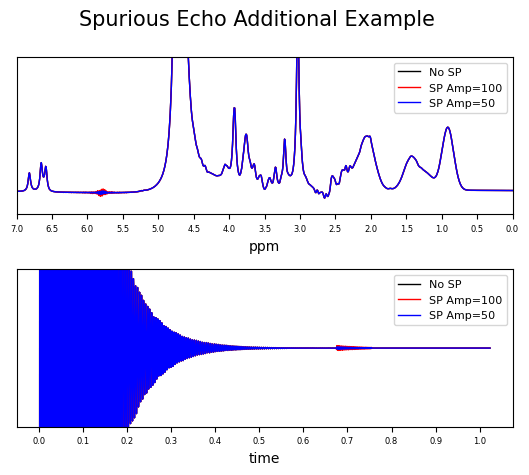

In [22]:
# Additional Spurious Echo EXAMPLE
# vars
import math
fids_pre3 = np.copy(fids[0:1, :])
fids_post3 = np.copy(fids[0:1, :])
fids_post4 = np.copy(fids_post3)

# MANUAL vars
lf = 127
amp3 = 100
amp4 = 50
phase = 2
cs = 5.75           # echo placed at 5.75 ppm

# Calc vars
cs = 5.65 - cs
lf, t_all = (2*np.pi*lf), np.max(time, axis=0)

nmb_sps = 1
tstart = 675
s = np.min(np.where(time>=(tstart*1e-03)))
tfinish = 755
f = np.min(np.where(time>=(tfinish*1e-03)))

# sp
echo3 = amp3*np.exp(-abs(time[s:f])/t_all)*np.exp(1j*(lf*(1-cs)*time[s:f]+phase))
echo4 = amp4*np.exp(-abs(time[s:f])/t_all)*np.exp(1j*(lf*(1-cs)*time[s:f]+phase))

fids_post3[:, s:f] = fids_post3[:, s:f] * echo3
fids_post4[:, s:f] = fids_post4[:, s:f] * echo4

# Prepare EC Contaminated Data for Plotting
specs_pre3 = to_specs(fids_pre3)
specs_post3 = to_specs(fids_post3)
specs_post4 = to_specs(fids_post4)

# Plot
fig, ax = plt.subplots(2)
fig.suptitle(f"Spurious Echo Additional Example", fontsize=15)
ax[0].plot(ppm, np.squeeze(specs_pre3).real, 'black', linewidth=1, label='No SP')
ax[0].plot(ppm, np.squeeze(specs_post3).real, 'red', linewidth=1, label='SP Amp=100')
ax[0].plot(ppm, np.squeeze(specs_post4).real, 'blue', linewidth=1, label='SP Amp=50')
ax[0].set_xlim(0, 7.0)
ax[0].set_ylim(0, 0.035)
ax[0].set_xlabel('ppm')
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
ax[0].invert_xaxis()
ax[0].get_yaxis().set_visible(False)
ax[0].legend(loc="upper right", fontsize=8)

ax[1].plot(time, np.squeeze(fids_pre3).real, 'black', linewidth=1, label='No SP')
ax[1].plot(time, np.squeeze(fids_post3).real, 'red', linewidth=1, label='SP Amp=100')
ax[1].plot(time, np.squeeze(fids_post4).real, 'blue', linewidth=1, label='SP Amp=50')
ax[1].set_ylim(0.0003, -0.0003)
ax[1].xaxis.set_major_locator(plticker.MultipleLocator(base=0.1))
ax[1].set_xlabel('time')
ax[1].get_yaxis().set_visible(False)
ax[1].legend(loc="upper right", fontsize=8)

plt.subplots_adjust(hspace=0.35)
plt.show()
